Кластеризация методом k-средних (k-means)
=============

Полезные ссылки:
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/clustering.html

In [1]:
from os import getcwd

# Активация библиотек

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [2]:
#  Будем использовать процедуру KMeans из библиотеки sklearn

from sklearn.cluster import KMeans


Пример 1. Beverage
--------

In [5]:
#  Задаем путь к рабочей папке
os.chdir("1_beverage/")


In [6]:
#  Импортируем файл с данными
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')
#  Все хорошо?
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).


Для кластеризации методом k-means необходимо задать число кластеров k. 
Попробуем k = 3. 

Вопрос для самопроверки. <br>
Надо ли стандартизовать переменные?

####  Кластеризация

In [7]:
#  максимальное число итераций 
max_iter_1 = 300

In [8]:
# инициализация модели
model = KMeans(n_clusters=3, random_state=42, max_iter=max_iter_1, n_init=10, 
               verbose=0, tol=0.0001 )

# random_state - зерно датчика случайных чисел. 
# При повторных вызовах процедуры с тем же значением зерна random_state 
# модель будет давать одинаковые результаты.

In [9]:
# Кластеризация данных из таблицы df
model.fit(df)

C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


####  Достаточно ли итераций?

In [10]:
#  Сколько итераций потребовалось процедуре?
model.n_iter_

4

In [11]:
max_iter_2 = 2

In [12]:
#  Если итерации кончились, 
#  а алгоритм не успел завершить работу, 
#  будет ли выдано сообщение об этом?

model_tmp = KMeans(n_clusters=3, random_state=42, max_iter=max_iter_2, verbose=0 )
model_tmp.fit(df)

C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,2
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [13]:
#  Сообщение не появилось...
model_tmp.n_iter_

2

In [14]:
#  Проверяем, сошелся ли алгоритм KMeans

if model_tmp.n_iter_ == max_iter_2:
    print("Не сошлось за ", model_tmp.n_iter_ , " итераций") 
else:
    print("Сошлось за ", model_tmp.n_iter_ , " итераций") 

Не сошлось за  2  итераций


In [15]:
#  Все параметры и их значения по умолчанию

#  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, 
#         tol=0.0001, verbose=0, 
#         random_state=None, copy_x=True, algorithm='auto')

####  Результаты кластеризации

In [16]:
#  Результат кластеризации набора данных из таблицы df
#  Номера кластеров начинаются с 0, 
#  а не с 1, как в иерархическом кластерном анализе
model.labels_

array([2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0], dtype=int32)

In [17]:
# координаты центров кластеров
model.cluster_centers_

array([[ 1.11022302e-16,  1.00000000e+00,  5.45454545e-01,
         5.45454545e-01, -5.55111512e-17, -5.55111512e-17,
         9.09090909e-01,  0.00000000e+00],
       [ 1.00000000e+00,  2.50000000e-01,  8.33333333e-02,
         0.00000000e+00,  9.16666667e-01, -5.55111512e-17,
        -5.55111512e-17,  3.33333333e-01],
       [ 7.27272727e-01,  2.72727273e-01,  9.09090909e-02,
         9.09090909e-02,  4.54545455e-01,  1.00000000e+00,
         9.09090909e-02,  4.54545455e-01]])

Как определить число кластеров, не угадывая? <br>
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера. Кластеризацию будем считать условно хорошей, если инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\clust

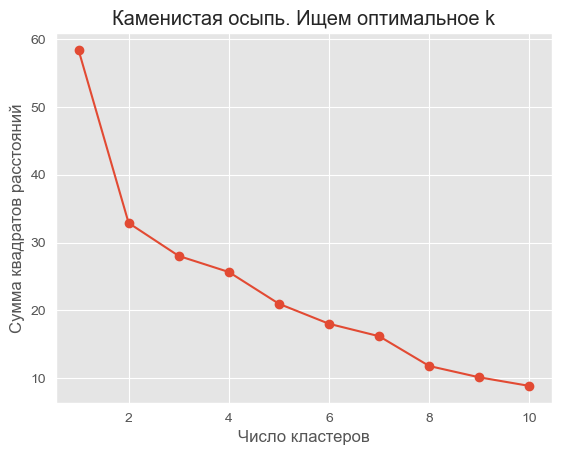

In [18]:
K = range(1, 11)

# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Допустим, мы решили, что излом над числом три. <br>
Тогда три кластера -- это оптимальный выбор. <br>
Перейдем к интерпретации кластеров, посмотрим, чем они отличаются друг от друга. Для этого применим метод ```labels_```, а затем посчитаем средние значения переменных для каждого кластера.

In [19]:
#  К таблице данных df добавим столбец cluster, 
#  содержащий код того кластера, в который попал объект.
df['cluster'] = model.labels_

df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
1,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333
2,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545


Получили те же значения, что и координаты центров кластеров в model.cluster_centers_ <br>
Совпадение?

In [20]:
#  напоминание
# координаты центров кластеров
model.cluster_centers_

array([[ 1.11022302e-16,  1.00000000e+00,  5.45454545e-01,
         5.45454545e-01, -5.55111512e-17, -5.55111512e-17,
         9.09090909e-01,  0.00000000e+00],
       [ 1.00000000e+00,  2.50000000e-01,  8.33333333e-02,
         0.00000000e+00,  9.16666667e-01, -5.55111512e-17,
        -5.55111512e-17,  3.33333333e-01],
       [ 7.27272727e-01,  2.72727273e-01,  9.09090909e-02,
         9.09090909e-02,  4.54545455e-01,  1.00000000e+00,
         9.09090909e-02,  4.54545455e-01]])

In [21]:
# К какому кластеру отнести новое наблюдение? Метод predict.
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2, 1], dtype=int32)

In [22]:
#  Подсчитаем объемы кластеров
df.groupby('cluster').size()

cluster
0    11
1    12
2    11
dtype: int64

Пример 2. Кластеризация претендентов.
----------------------

In [33]:
#  задаю путь к рабочей папке

os.chdir(os.getcwd()+"/../2_pretendent")

In [34]:
#  Импортируем файл с данными
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
#  Все хорошо?
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [35]:
# В колонке NR находится номер объекта, 
# его нужно удалить перед кластеризацией
del df['NR']

Вопрос для самопроверки. <br>
Надо ли стандартизовать переменные?

Подготовка данных завершена.  <br>
Следующий шаг - определение числа кластеров

C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\clust

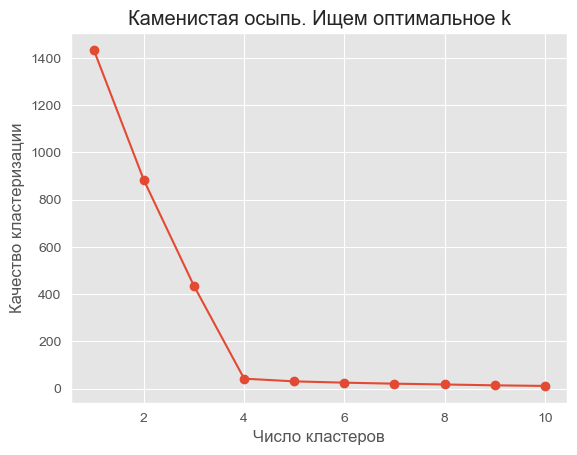

In [36]:
# Строим 10 моделей с числом кластеров от 1 до 10. 
K = range(1, 11)


# Не рационально, сохраняем модель, тогда как достаточно хранить только model.inertia_
models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df) for k in K]

#  Качество кластеризации вычисляется в model.inertia_
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
# Добавляем на график текст
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Вывод: число кластеров равно 4. <br>
Строим окончательную модель.

In [37]:
model = KMeans(n_clusters=4, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()


C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
0,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50


Пример 3. Потребление протеинов в Европе
---------------------

In [41]:
#  задаю путь к рабочей папке
os.chdir(os.getcwd()+"/../3_Protein Consumption in Europe")

In [42]:
#  Импортируем файл с данными
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
#  Все хорошо?
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [43]:
# Стандартизуем переменные
from sklearn import preprocessing



In [44]:
# Стандартизуем переменные

norm = preprocessing.StandardScaler()
norm.fit(df)
X = norm.transform(df)

C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\clust

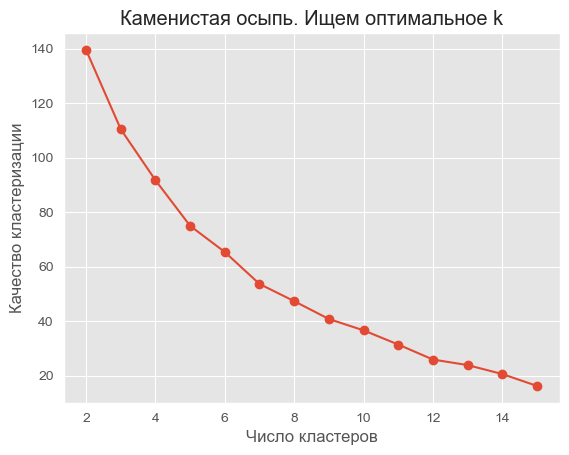

In [45]:
#  Определяем число кластеров

K = range(2, 16)
models = [KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10, 
               verbose=0, tol=0.0001).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')

plt.show()

In [46]:
#  Попробуем вариант с 5 кластерами...

model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, 
               verbose=0, tol=0.0001 )
model.fit(X)
df['cluster'] = model.labels_


C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
#  Выведем состав каждого кластера
df['cluster'].sort_values()

Country
Austria           0
Belgium           0
Ireland           0
France            0
Netherlands       0
Switzerland       0
W_Germany         0
UK                0
Romania           1
Albania           1
Bulgaria          1
Yugoslavia        1
Poland            2
Hungary           2
E_Germany         2
Czechoslovakia    2
USSR              2
Greece            3
Spain             3
Italy             3
Portugal          3
Norway            4
Denmark           4
Finland           4
Sweden            4
Name: cluster, dtype: int32

In [48]:
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
0,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.650,2.0625,4.175
1,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.950,5.0500,2.975
2,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.560,2.5400,4.260
3,8.1250,3.8000,2.4750,11.2000,7.625,33.675,3.975,5.6750,7.075
4,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.550,1.1750,2.125


Стоит еще попробовать варианты с 4 или с 6 кластерами...

In [49]:
#  Попробуем вариант с 6 кластерами...

model_6 = KMeans(n_clusters=6, random_state=42, max_iter=300, n_init=10, 
               verbose=0, tol=0.0001 )
model_6.fit(X)
df['cluster'] = model_6.labels_


C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
#  Выведем состав каждого кластера
df['cluster'].sort_values()

Country
Austria           0
Czechoslovakia    0
E_Germany         0
Poland            0
Netherlands       0
W_Germany         0
Switzerland       0
Hungary           1
USSR              1
Romania           1
Bulgaria          1
Yugoslavia        1
Albania           1
Portugal          2
Ireland           3
France            3
UK                3
Belgium           3
Denmark           4
Finland           4
Norway            4
Sweden            4
Italy             5
Greece            5
Spain             5
Name: cluster, dtype: int32

##  Что произойдет, 
##  если изменить стандартизацию?

In [51]:
# Стандартизуем переменные

norm_2 = preprocessing.MaxAbsScaler()
# norm_2 = preprocessing.StandardScaler()
norm_2.fit(df)
X_2 = norm_2.transform(df)

In [52]:
model_2 = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, 
               verbose=0, tol=0.0001 )
model_2.fit(X_2)
df['cluster_2'] = model_2.labels_

C:\Users\Alexander\.conda\envs\Analysis_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
#  Выведем состав каждого кластера
df['cluster_2'].sort_values()

Country
Belgium           0
Denmark           0
Finland           0
France            0
Ireland           0
Norway            0
UK                0
Sweden            0
Greece            1
Spain             1
Italy             1
Austria           2
Poland            2
Netherlands       2
E_Germany         2
Czechoslovakia    2
W_Germany         2
Switzerland       2
Portugal          3
Bulgaria          4
Hungary           4
Albania           4
Romania           4
USSR              4
Yugoslavia        4
Name: cluster_2, dtype: int32